# Time Series Analysis of WTI Oil Prices Using ARIMA 

## Introduction 

### Crude oil is the raw natural resource that is extracted from the earth and refined into products such as gasoline, jet fuel, and other petroleum products. where oil comes from makes a difference, and because of that, we need benchmarks to value the commodity based on its quality and location. one of the most important benchmarks in the United States and the world is WTI. West Texas Intermediate (WTI) crude oil is a specific grade of crude oil and one of the main three benchmarks in oil pricing, along with Brent and Dubai Crude. WTI oil is extracted from wells in the U.S and sent via pipelines to Cushing, Oklahoma. For this forecast, we used WTI to demonstrate the world crude oil price changes.
### Oil is a sensitive commodity meaning oil prices can go completely in the opposite direction after a single market event. That is because oil prices are rarely based on real time data, instead, it is driven by other factors, such as geopolitical changes in the region, making our effort to forecast it more difficult. The reason we are creating this model is because of how linked the health of the economy is to oil prices. Whenever there is a turmoil in oil prices, the economy is affected drastically. The objective of this project is to build a model that will forecast future oil prices.  


## Importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns 
import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats 
import pylab 
from pandas.plotting import lag_plot
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import chi2
import statsmodels.api as sm

##  Collecting the right data set is one of the most important aspects of a data science project. For this project, the data that is needed is oil prices over the last 33 years.  investing.com is a reliable and great  source for finaancial information. 
###  Link: [ https://www.investing.com/commodities/crude-oil-historical-data]

In [2]:
oil_table = pd.read_csv('C:\\Users\\shag1\\Personal Project\\Crude Oil WTI Futures Historical Data.csv')
oil_table.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,6-Sep-20,38.75,39.47,39.48,38.57,-,-2.56%
1,4-Sep-20,39.77,41.25,41.87,39.35,-,-3.87%
2,3-Sep-20,41.37,41.63,41.79,40.22,417.63K,-0.34%
3,2-Sep-20,41.51,43.02,43.21,41.23,421.77K,-2.92%
4,1-Sep-20,42.76,42.83,43.43,42.72,285.15K,0.35%


## We give quantative summary of WTI prices

In [3]:
oil_table.Price.describe()

count    8369.000000
mean       45.673949
std        29.005576
min       -37.630000
25%        20.250000
50%        35.380000
75%        64.640000
max       145.290000
Name: Price, dtype: float64

# Data processing

## Converting the text to  datetime 

In [4]:
oil_table.Date = pd.to_datetime(oil_table.Date, dayfirst = True)

In [5]:
oil_table.head

<bound method NDFrame.head of            Date  Price   Open   High    Low     Vol. Change %
0    2020-09-06  38.75  39.47  39.48  38.57        -   -2.56%
1    2020-09-04  39.77  41.25  41.87  39.35        -   -3.87%
2    2020-09-03  41.37  41.63  41.79  40.22  417.63K   -0.34%
3    2020-09-02  41.51  43.02  43.21  41.23  421.77K   -2.92%
4    2020-09-01  42.76  42.83  43.43  42.72  285.15K    0.35%
...         ...    ...    ...    ...    ...      ...      ...
8364 1987-09-14  19.61  19.27  19.65  19.15   19.32K    1.08%
8365 1987-09-11  19.40  19.55  19.57  19.26   16.95K   -1.37%
8366 1987-09-10  19.67  19.41  19.75  19.36   29.33K    1.50%
8367 1987-09-09  19.38  19.04  19.40  19.01   20.59K    2.32%
8368 1987-09-08  18.94  18.87  18.98  18.72   27.13K   -1.97%

[8369 rows x 7 columns]>

In [6]:
oil_table.Date.describe()

count                    8369
unique                   8369
top       1987-09-15 00:00:00
freq                        1
first     1987-09-08 00:00:00
last      2020-09-06 00:00:00
Name: Date, dtype: object

## Setting the Index 

In [7]:
oil_table.set_index("Date", inplace =True)

In [8]:
oil_table.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-09-06,38.75,39.47,39.48,38.57,-,-2.56%
2020-09-04,39.77,41.25,41.87,39.35,-,-3.87%
2020-09-03,41.37,41.63,41.79,40.22,417.63K,-0.34%
2020-09-02,41.51,43.02,43.21,41.23,421.77K,-2.92%
2020-09-01,42.76,42.83,43.43,42.72,285.15K,0.35%


## Setting the desired frequency

In [9]:
#data_freq = oil_table.asfreq('b')

## Checking for missing dates 

In [10]:
missing_val_count_by_column = oil_table.isnull().sum()
missing_val_count_by_column

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

## Droping columns that wont be used for the model  

In [11]:
oil_price = oil_table.drop(['Open','High','Low','Vol.', 'Change %'], axis= 1)

In [12]:
oil_price.dropna()

,Price
Date,
2020-09-06,38.75
2020-09-04,39.77
2020-09-03,41.37
2020-09-02,41.51
2020-09-01,42.76
...,...
1987-09-14,19.61
1987-09-11,19.40
1987-09-10,19.67


## Visualizing Data 

### By inspecting the graph, we can see that the time series is not stationary; however, we will run an ADF test to confirm that the data is not stationary. 

Text(0, 0.5, 'Price')

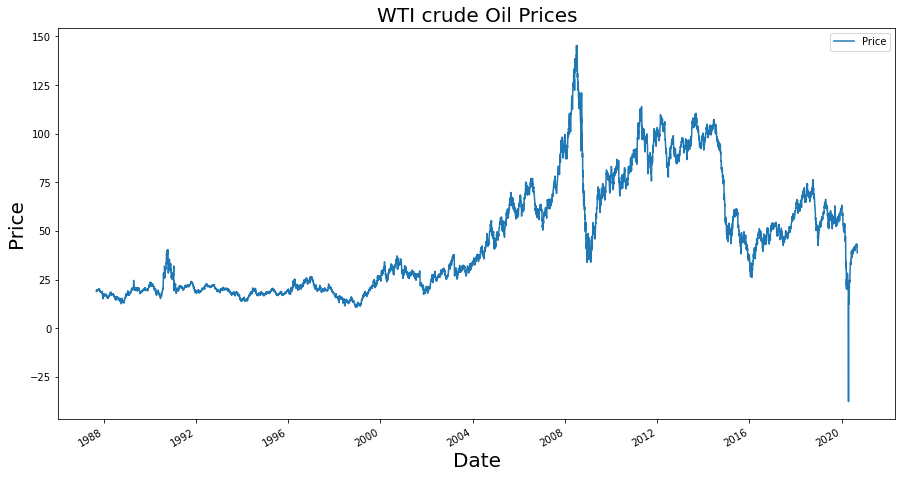

In [13]:
oil_price.plot(figsize=(15, 8))
plt.title('WTI crude Oil Prices', size=20)
plt.xlabel('Date', size=20)
plt.ylabel('Price', size=20)

### QQ plot

((array([-3.76636815, -3.53872691, -3.41363313, ...,  3.41363313,
          3.53872691,  3.76636815]),
  array([-37.63,  10.01,  10.72, ..., 145.08, 145.18, 145.29])),
 (27.292904389627036, 45.67394909786114, 0.9406146498801148))

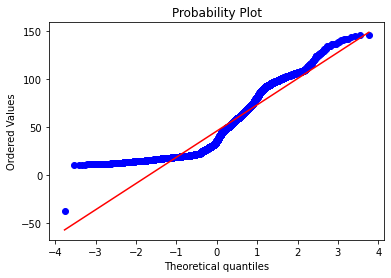

In [14]:
scipy.stats.probplot(oil_price.Price, plot =pylab)

### Auto Correlation Function (ACF) before applying transformations. 
### We can use ACF to determine the optimal number of Moving Average terms. 

Text(0.5, 1.0, 'Autocorrelation For Time Series')

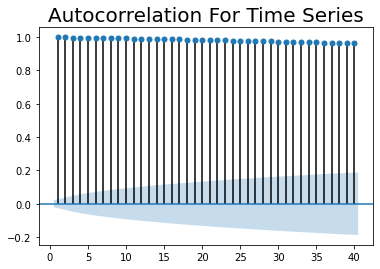

In [15]:
# ACF
sgt.plot_acf(oil_price.Price, lags = 40, zero = False)
plt.title("Autocorrelation For Time Series", size = 20)


###  Partial Auto Correlation Function (PACF) before applying transformations.

### We can use PACF to determine the optimal number of terms to use in the Auto Regressive model

Text(0.5, 1.0, 'PACF Oil Prices For Time Series')

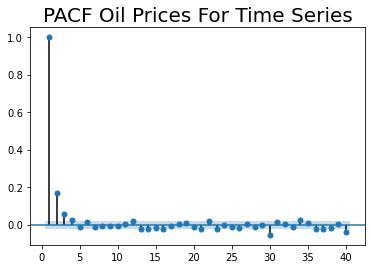

In [16]:
#PACF
sgt.plot_pacf(oil_price.Price, lags = 40, zero = False, method = ('ols'))
plt.title("PACF Oil Prices For Time Series", size = 20)

## Time Series Transformation 

### Augmented Dickey-Fuller Test: The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics
###  The P-value > 0.05. The test statistic is higher than the 10% critical value therefore the results are statistically significant at 90% confidence interval we can’t reject the null hypothesis of ADF test. The time series is not stationary

In [17]:
# ACDF test(Dickey–Fuller test)
DF_test = sts.adfuller(oil_price.Price, autolag='AIC')

DF_table = pd.Series(DF_test[0:4], index=['Test Statistic','p-value','Number of Lags used ','Number of observations used'])

for key,value in DF_test[4].items():
    DF_table['Critical Value (%s)'%key] = value
DF_table



Test Statistic                   -2.146984
p-value                           0.226046
Number of Lags used              37.000000
Number of observations used    8331.000000
Critical Value (1%)              -3.431135
Critical Value (5%)              -2.861887
Critical Value (10%)             -2.566955
dtype: float64

###  Diffrencing  
### In this method, we compute the difference of consecutive terms in the series. Differencing is typically performed to get rid of the varying mean. Mathematically, differencing can be written as: 

$$ yt‘ = yt – y(t-1) $$ 



<ipython-input-18-b85acb7b2834>:1: RuntimeWarning: invalid value encountered in log
  log_1 = np.log(oil_price).dropna()


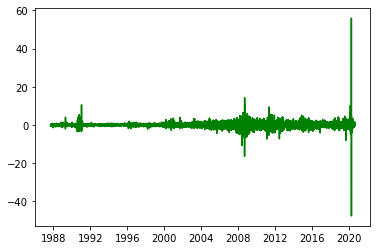

In [18]:
log_1 = np.log(oil_price).dropna()
daily_series_diff1 = (oil_price.diff(periods=1)).dropna()
plt.plot(daily_series_diff1, color='green')

### Augmented Dickey-Fuller Test
### Perform ADF after differening to test for Stationarity 

In [19]:
DF_test = sts.adfuller(daily_series_diff1)

DF_table = pd.Series(DF_test[0:4], index=['Test Statistic','p-value','Number of Lags used ','Number of observations used'])

for key,value in DF_test[4].items():
    DF_table['Critical Value (%s)'%key] = value
DF_table


Test Statistic                -1.293854e+01
p-value                        3.574987e-24
Number of Lags used            3.600000e+01
Number of observations used    8.331000e+03
Critical Value (1%)           -3.431135e+00
Critical Value (5%)           -2.861887e+00
Critical Value (10%)          -2.566955e+00
dtype: float64

### Auto Correlation Function (ACF) After applying transformations. 


Text(0.5, 1.0, 'ACF For Stationary Time Series')

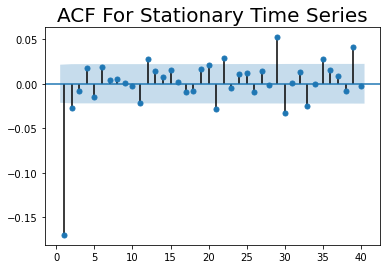

In [20]:
sgt.plot_acf(daily_series_diff1, lags = 40, zero = False)
plt.title("ACF For Stationary Time Series", size = 20)

###  Partial Auto Correlation Function (PACF) before applying transformations.

Text(0.5, 1.0, 'PACF For Stationary Time Series')

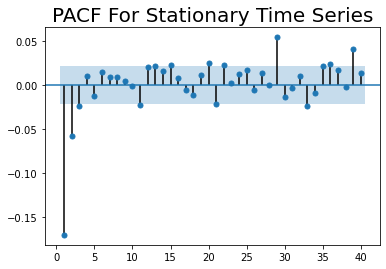

In [21]:
sgt.plot_pacf(daily_series_diff1, lags = 40, zero = False, method = ('ols'))
plt.title("PACF For Stationary Time Series", size = 20)

 ## Check for seasonality 

<ipython-input-22-0fd57719c97a>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(oil_price, model = "additive", freq=30)


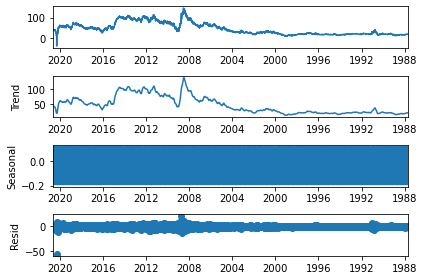

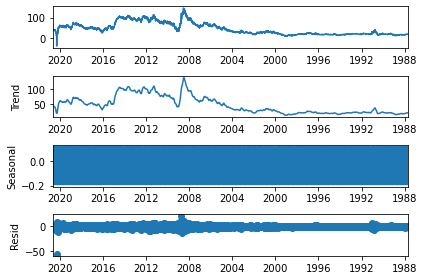

In [22]:
decomposition = seasonal_decompose(oil_price, model = "additive", freq=30)
decomposition.plot() 

## Model Building 

### The ARIMA model adds differencing to an ARMA model. Differencing subtracts the current value from the previous and can be used to transform a time series into one that’s stationary

### Determining p, d, q
### In our case, we see the first order differencing make the time series stationary. d = 1
### After checking PCAF graph, it's clearly that within 2 lags the AR is significant.  We will use AR = 2
### To avoid the potential for incorrectly specifying the MA order, it may often make sense to extend the lag observed from the last significant term in the PACF therefore we will use MA = 0 

In [23]:
model1 = ARIMA(oil_price, order=(0,1,2))
model1_fit = model1.fit(disp=0)
print(model1_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                 8368
Model:                 ARIMA(0, 1, 2)   Log Likelihood              -14623.844
Method:                       css-mle   S.D. of innovations              1.389
Date:                Sun, 27 Sep 2020   AIC                          29255.688
Time:                        13:42:40   BIC                          29283.817
Sample:                             1   HQIC                         29265.295
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0024      0.012     -0.199      0.842      -0.026       0.021
ma.L1.D.Price    -0.1810      0.011    -16.585      0.000      -0.202      -0.160
ma.L2.D.Price    -0.0285      0.011     

C:\Users\shag1\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\shag1\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\shag1\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\shag1\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

## Model Diagnosis 

### Visualize Model's Residual Error Values

###  Looking at the residuals plot, we can see that the residuals are centered around zero and have a uniform variance. Some residuals have high values. 
###  The density plot suggest normal distribution with mean zero

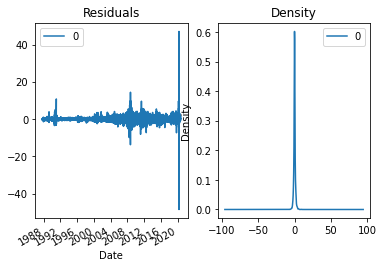

In [24]:
residuals = pd.DataFrame(model1_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

## Model Evaluation
### Actual vs Fitted

### We plot the fitted value and the real value of oil prices below. It show very high inconsistency. which indicats bad performance of our ARIMA model 

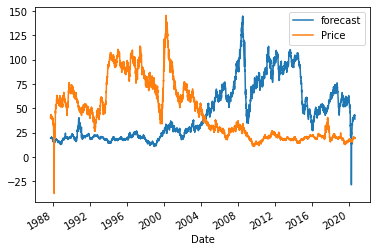

In [25]:
pred = model1_fit.plot_predict(dynamic=False)
plt.show()

 ### Predict

In [26]:
forecast1 = model1_fit.forecast(steps=8369)[0]

## Mean Squared Error

In [27]:
#calculate mse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(oil_price,forecast1))
print(rms)

44.56724528345663


## Auto ARIMA

###  We suspect that the oil price time series has yearly seasonality
### unlike the first model, we account for seasonality in this model. 

In [28]:
import pmdarima as pm
model = pm.auto_arima(oil_price, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=7, max_q=7, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=29255.761, Time=2.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=29527.704, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=29284.480, Time=0.54 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=29260.666, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=29525.728, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=29257.590, Time=2.88 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=29257.642, Time=2.96 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=29255.688, Time=0.71 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=29257.592, Time=1.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=29255.693, Time=4.50 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=29253.728, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=29258.704, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=29255.682, Time=0.98 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=29255.632, Time=0.45 sec
 ARIMA(1,1,1)(0,0,0

## Model Diagnosis

### ACF plot shows the residual errors are not autocorrelated
### Looking at the residuals plot, we can see that the residuals are centered around zero and have a uniform variance. Some residuals have high values. 
### The qq plot shows that the residuals are distributed around the line which indicated that residuals have a normal distribution. We can also see that there some points deviating from the line would imply that the distribution is skewed.
###  The density plot suggest normal distribution with mean zero

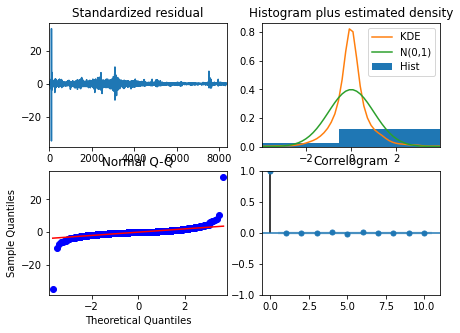

In [29]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

## Model Evaluation

### Predict

In [30]:
pred = model.predict(n_periods=8369)

### Mean Squared Error

### By using auto arima to account  for seasonality in our time series, We were able to obtaina a better model in terms of  accuracy.   

In [31]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(oil_price,pred))
print(rms)

39.3722870989301
